<a href="https://colab.research.google.com/github/catedra-iq/parcial_2021_1f/blob/main/analisis/analisis_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KernelDensity
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/catedra-iq/parcial_2021_1f/main/csv/datos_anonimizados.csv')
df.fillna(0)
df.replace({'-':0}, inplace = True)
notas = df[[nodo for nodo in df.columns if 'Cuestionario' in nodo]].astype(float)
# notas[[nodo for nodo in notas.columns]] = MinMaxScaler(notas.to_numpy())
notas['total_avanzada'] = notas[[col for col in notas.columns if 'Avanzada' in col]].sum(axis = 1)
notas['total_basica'] = notas[[col for col in notas.columns if 'Básica' in col]].sum(axis = 1)
notas['total'] = notas.sum(axis = 1)
notas['comision'] = df.comision

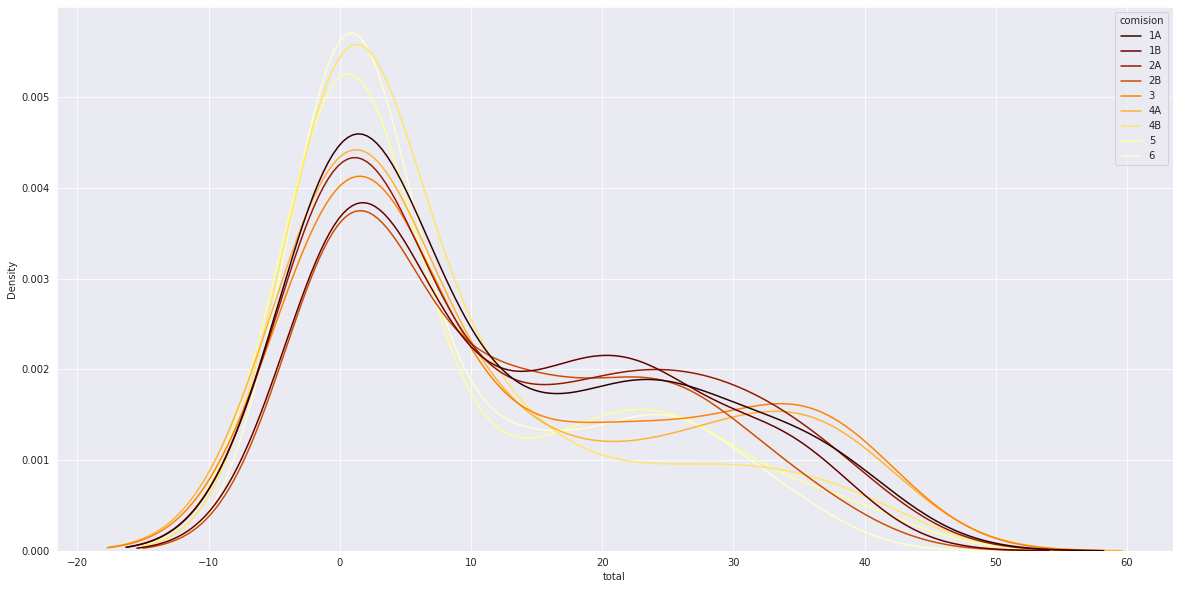

In [62]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.kdeplot('total', data = notas,hue = 'comision' , palette = 'afmhot', fill =False, alpha = .1)
# sns.kdeplot('total_avanzada', data = notas,hue = 'comision' , palette = 'viridis', fill = True, alpha = .1)
plt.savefig('plots/total.png')
plt.show()


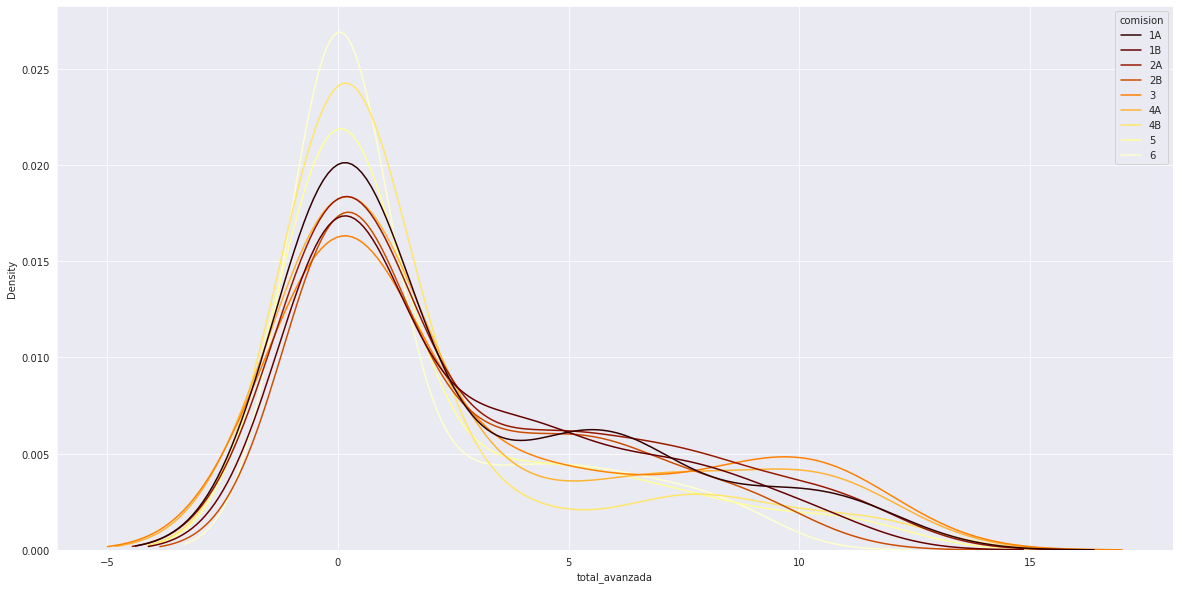

In [61]:
fig, ax = plt.subplots(1,1, figsize = (20,10))

sns.kdeplot('total_avanzada', data = notas,hue = 'comision' , palette = 'afmhot', alpha = .1)
plt.savefig('plots/avanzada.png')
plt.show()

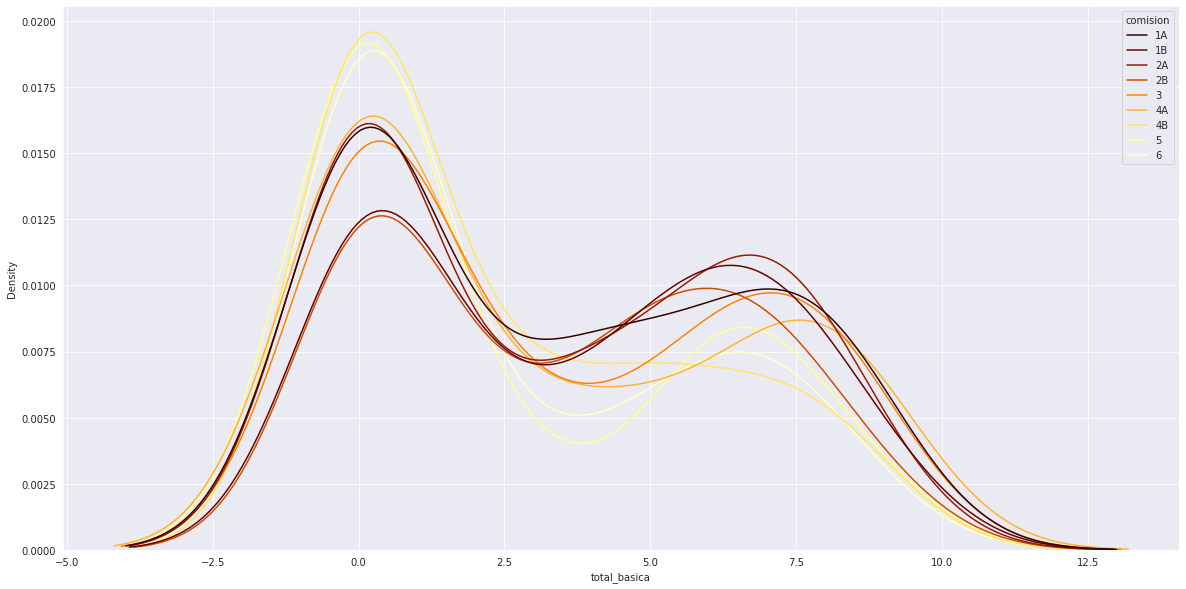

In [60]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.kdeplot('total_basica', data = notas,hue = 'comision' , palette = 'afmhot', alpha = .1)
plt.savefig('plots/basica.png')
plt.show()

In [111]:
total_ = notas['total'][notas['comision'] == '1A']
total_fit = total_.to_numpy().reshape(-1,1)
modelo = Pipeline([
                   ('fit', KernelDensity(kernel = 'gaussian'))
])
hyperparams = {'fit__bandwidth': [0.2]}
grilla = GridSearchCV(modelo, hyperparams)
grilla.fit(data.to_numpy().reshape(-1,1))
mejor_modelo = grilla.best_estimator_
pred = mejor_modelo.score_samples(data.to_numpy().reshape(-1,1))

In [107]:
pp = pred.reshape(-1,1)

In [108]:
pp, 

(array([[-0.28282278],
        [-0.28282278],
        [-3.68194307],
        [-0.28282278],
        [-3.26333176],
        [-3.5939091 ],
        [-3.59751584],
        [-0.28282278],
        [-3.09433877],
        [-3.8091625 ],
        [-3.02182388],
        [-0.28282278],
        [-3.73782924],
        [-3.56269789],
        [-3.26341519],
        [-2.98527223],
        [-0.28282278],
        [-3.80192724],
        [-0.28282278],
        [-3.5614955 ],
        [-0.28282278],
        [-3.66963618],
        [-0.28282278],
        [-3.17652713],
        [-3.11616125],
        [-0.28282278],
        [-0.28282278],
        [-3.76630759],
        [-3.80880251],
        [-3.32559637],
        [-3.80931029],
        [-0.28282278],
        [-0.28282278],
        [-3.54374641],
        [-0.28282278],
        [-2.69472232],
        [-0.28282278],
        [-3.1879361 ],
        [-3.80931029],
        [-3.71652744],
        [-3.25637881],
        [-3.26341735],
        [-2.69472232],
        [-3

In [119]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 2, random_state = 42)
gm.fit(total_fit)
pp = gm.predict(total_fit)
gm.means_

1e-06

(array([56.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 34.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

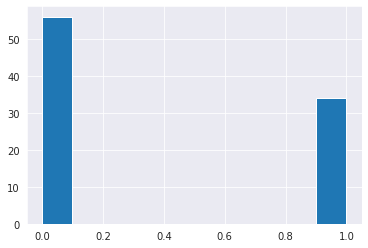

In [116]:
plt.hist(pp)

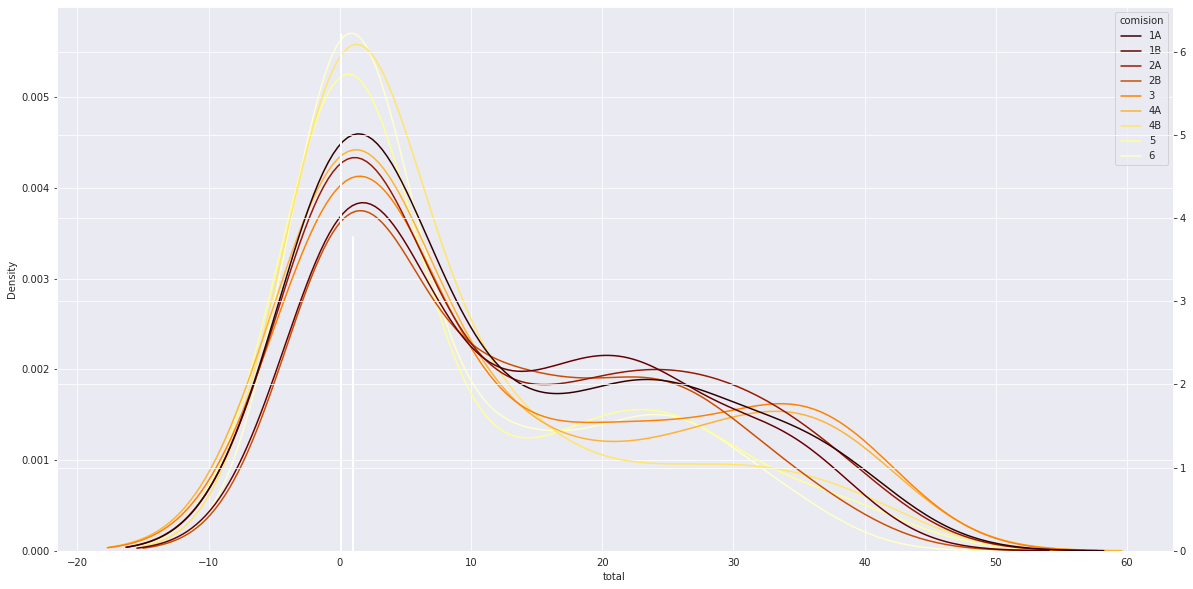

In [114]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.kdeplot('total', data = notas,hue = 'comision' , palette = 'afmhot', fill =False, alpha = .1, ax = ax)
# sns.kdeplot('total_avanzada', data = notas,hue = 'comision' , palette = 'viridis', fill = True, alpha = .1)
plt.savefig('plots/total.png')
# ax.set_ylim(top = .006)
ax2 = ax.twinx()
ax2.hist(pp, density= True)
# ax2.set_ylim(top = 1)
plt.show()

In [162]:
gm2 = GaussianMixture(n_components=2,random_state=42)
predicciones = []
medias= {}
# np.array(len())
for comision in notas.comision.value_counts().index:
  data = notas['total'][notas['comision'] == comision].to_numpy().reshape(-1,1)
  predicciones.append((gm2.fit_predict(data), comision))
  medias[comision] = gm2.means_.flatten().tolist()
fit_tot = (pd.DataFrame(medias, index = ['gauss_1_tot', 'gauss_2_tot']).T/21)*10

In [149]:
(pd.DataFrame(medias).T/21)*10

,0,1
1A,9.124109,0.000000
2A,0.000000,9.376507
4A,9.474648,0.000000
3,9.210810,0.000000
4B,0.000000,7.528510
5,0.000000,8.485942
1B,0.000000,7.981983
6,0.000000,6.981558
2B,0.000000,7.662446


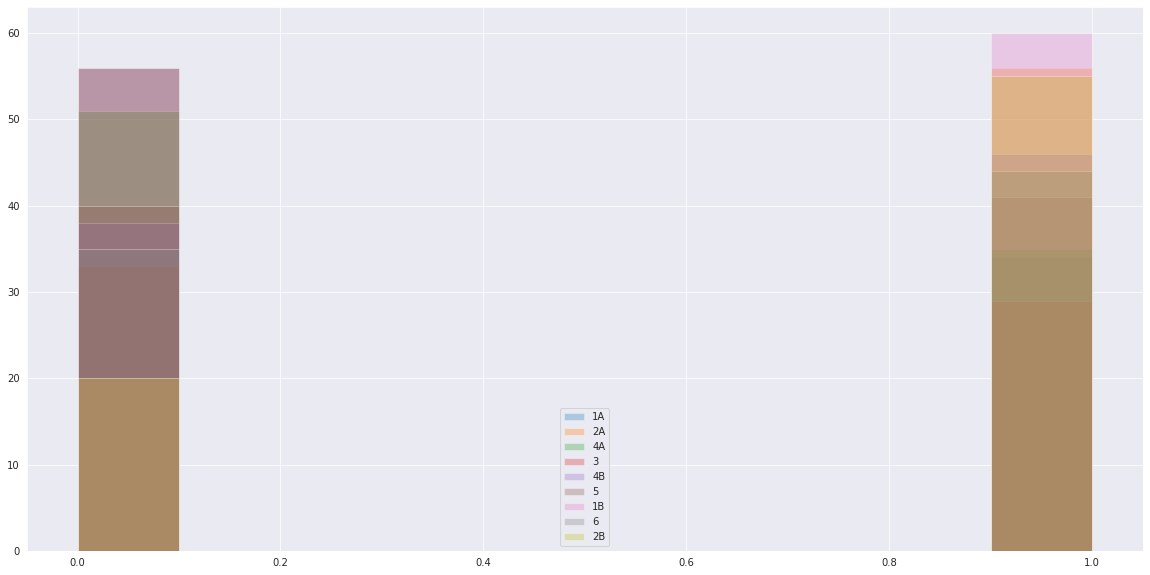

In [132]:
fig, ax = plt.subplots(1,1,figsize = (20,10))
for nodo in predicciones:
  ax.hist(nodo[0], label = nodo[1], alpha = .3)
plt.legend()
plt.show()

In [161]:
gm2 = GaussianMixture(n_components=2,random_state=42)
predicciones = []
medias= {}
# np.array(len())
for comision in notas.comision.value_counts().index:
  data = notas['total_basica'][notas['comision'] == comision].to_numpy().reshape(-1,1)
  predicciones.append((gm2.fit_predict(data), comision))
  medias[comision] = gm2.means_.flatten().tolist()
fit_bas = (pd.DataFrame(medias, index = ['gauss_1_bas', 'gauss_2_bas']).T/9)*10

In [160]:
gm2 = GaussianMixture(n_components=2,random_state=42)
predicciones = []
medias= {}
# np.array(len())
for comision in notas.comision.value_counts().index:
  data = notas['total_avanzada'][notas['comision'] == comision].to_numpy().reshape(-1,1)
  predicciones.append((gm2.fit_predict(data), comision))
  medias[comision] = gm2.means_.flatten().tolist()
fit_avz = (pd.DataFrame(medias, index = ['gauss_1_avz', 'gauss_2_avz']).T/12)*10

In [163]:
pd.concat([fit_bas, fit_avz, fit_tot], axis = 1 )

,gauss_1_bas,gauss_2_bas,gauss_1_avz,gauss_2_avz,gauss_1_tot,gauss_2_tot
1A,6.003556,0.000000,4.754164,0.000000,9.124109,0.000000
2A,0.000000,5.898195,0.000000,4.811655,0.000000,9.376507
4A,5.974185,0.000000,5.250821,0.000000,9.474648,0.000000
3,5.660152,0.000000,5.772805,0.000000,9.210810,0.000000
4B,0.000000,5.144073,0.000000,4.184538,0.000000,7.528510
5,0.000000,5.595853,0.000000,4.901945,0.000000,8.485942
1B,5.443515,0.000000,0.000000,4.463662,0.000000,7.981983
6,0.000000,5.049547,0.000000,4.085788,0.000000,6.981558
2B,0.000000,5.244678,0.000000,3.907595,0.000000,7.662446


In [179]:
kde = KernelDensity(bandwidth=.2)
predicciones = []
medias= {}
# np.array(len())
for comision in notas.comision.value_counts().index:
  X = np.linspace(0,21,100).reshape(-1,1)
  data = notas['total'][notas['comision'] == comision].to_numpy().reshape(-1,1)
  kde.fit(data)
  predicciones.append((kde.score_samples(X), comision))
  # medias[comision] = gm2.means_.flatten().tolist()
fit_tot = (pd.DataFrame(medias, index = ['gauss_1_tot', 'gauss_2_tot']).T/21)*10


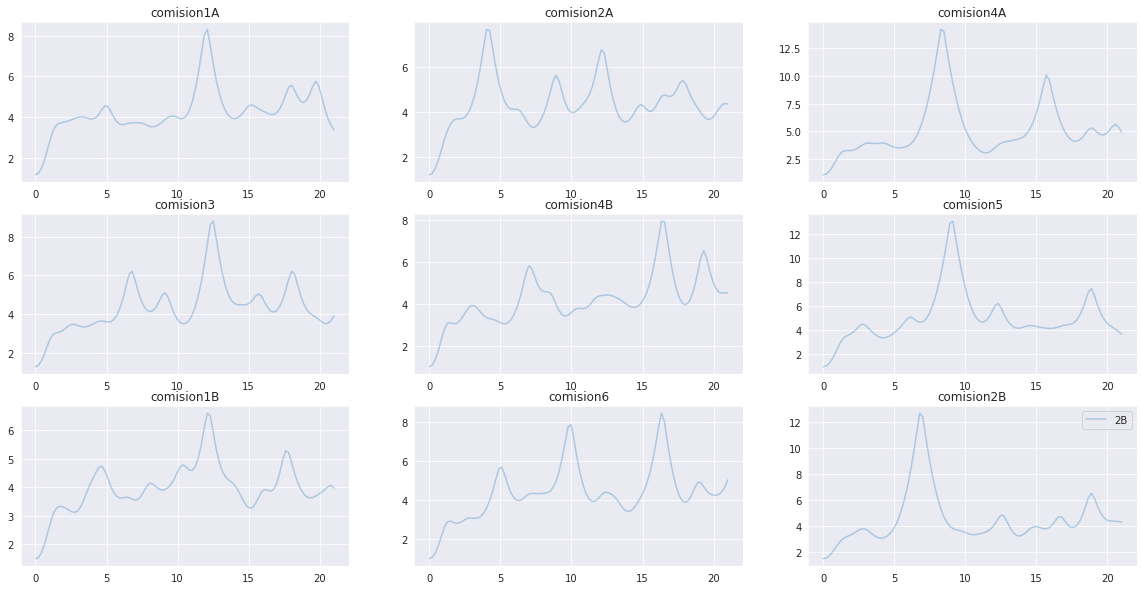

In [178]:
fig, ax = plt.subplots(3,3,figsize = (20,10))
ax = ax.flatten()
for i,nodo in enumerate(predicciones):
  ax[i].plot(X,-nodo[0], label = nodo[1], alpha = .3)
  ax[i].set_title(f'comision{nodo[1]}')
plt.legend()
plt.show()